# Animated plots

In [1]:
from IPython.display import HTML
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
N = 5
M = 100
points_evo_array = np.random.rand(M,N)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, M), ylim=(0, np.max(points_evo_array)))
lines = []

lines = [ax.plot([], [])[0] forXkcd python comment](https://imgs.xkcd.com/comics/python.png)

There are many compiled programming languages out
there: <b><i>C++, C, Fortran, ...</i></b>.<br/>  These
are the heavyweight languages which are great for
learning how to program "properly" (i.e. type safe) and
are <em>fast</em>. But they are designed more for the
computer, not so much for you.

The interpreted languages:<b><i>python</i></b>, ruby,
erlang, perl, gawk, bash, Java(ish)/javascript, go,
rust, MATLAB... are lightweight, designed to be as
simple as possible for you; however, many are
application specific and <em>slow</em>.
<br/>
<b>Python</b> is general, powerful, and popular... _ in range(N)]

def init():    
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j,line in enumerate(lines):
        line.set_data(range(i), [points_evo_array[:i,j]])
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,np.arange(1, M), init_func=init, interval=10, blit=True)

HTML(anim.to_html5_video())

# Gaussian number gen

In [1]:
import numpy.random

output_file = open("junk.dat", "w")
for i in range(100):
    y = numpy.random.normal(0.0, 1.0)
    output_file.write(str(i)+' '+str(y))

# File I/O

In [4]:
import numpy.random

output_file = open("junk.dat", "w")
for i in range(100):
    y = numpy.random.normal(0.0, 1.0)
    output_file.write(str(i)+' '+str(y))

# Histograms

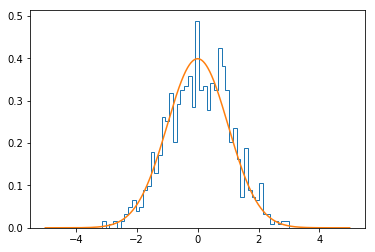

In [5]:
import numpy
import pylab

y_data = []
for i in range(1000):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Command line arguments

In [ ]:
#!/usr/bin/python
import sys
from optparse import OptionParser

# parse command line arguments
usage = "usage: %prog [options] arg"
parser = OptionParser(usage)
parser.add_option("--n", type="int", dest="nn", default=1)
(options, args) = parser.parse_args()

import numpy
import pylab

y_data = []
for i in range(options.nn):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Running other programs

In [6]:
import os
#Run the ls program
os.system("ls")

0

# Molecular dynamics example

This is a toy "spring" particles trapped
in a spring well, using a symplectic
integrator. Great example of python's
power (and its lack of speed). Balance
<em>your</em> programming time against the <em>run
time</em> when choosing scripting or compiled
languages.


In [ ]:
import numpy, pylab, math
box_length = 10
N = 20
dt = 0.1
k_particle = 5
diameter = 2.0
k_domain = 0.1
pos = (numpy.random.rand(N, 2) - 0.5) * box_length
vel = numpy.zeros((N,2))

def force(i, j):
    rij = pos[i] - pos[j]
    distance = numpy.linalg.norm(rij)
    if distance &gt; diameter or i == j:
        return numpy.array([0,0])
    rij_norm = rij / distance
    return k_particle * (diameter - distance) * rij_norm

while True:
    pylab.scatter(pos[:,0], pos[:,1], s=250)
    pylab.xlim(-box_length, +box_length)
    pylab.ylim(-box_length, +box_length)
    pylab.draw()
    pylab.pause(0.001)
    pylab.clf()
    
    for i in range(N):
        pos[i] += 0.5 * dt * vel[i]

    forces = numpy.zeros((N,2))
    for i in range(N):
        forces[i] += - k_domain * pos[i]
        for j in range(N):
            forces[i] += force(i,j)

    for i in range(N):
        vel[i] += dt * forces[i]
    
    for i in range(N):
        pos[i] += 0.5 * dt * vel[i]